# Exploration Data Stucture

## Introduction

In this BCI-EEG-STROKE project, the data comes from the CHU in a .mat format. The data is tranformed into .npy files for the purpose of this project. This function can find in the ml-eeg-lib library [mat_to_npy](./../../src/ml_eeg_tools/preprocessing/data_extraction.py).

The purpose of this notebook is to explore the data structure of the .npy files.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time

## Data Structure

Here is the structure of the data in the .npy files (exploration is done below):

### Format de stockage
- **Type de Données**: Tableau NumPy (Chaque élément du tableau représente une session pour un patient donné)

### Structure de chaque élément du tableau
1. **Identifiant Session**: Identifiant unique pour chaque session de test (e.g., '004').
2. **Côté de la Lésion**: Côté du cerveau qui est lésé (G pour Gauche, D pour Droit).
3. **Numéro de l'Essai**: Identifiant de l'essai en cours (e.g., 'Trial1').
4. **Fréquence d'Échantillonnage de l'Accélération**: Fréquence à laquelle les données d'accélération sont échantillonnées (e.g., 125 Hz).

#### Données de la Sous-Session Gauche
5. **Données Sous-Session Gauche**: Contient plusieurs sous-éléments:
    - **Côté**: Gauche (G)
    - **Index de Mouvement**: `IdvrMVTrddd`, Liste des index où un mouvement a été détecté.
    - **Données EEG**: Liste de paires `[nom, données]` où `nom` est le nom de l'électrode et `données` sont les mesures EEG correspondantes.
    - **Données Cinématiques**: `[AC, VAC, AC3d, VAC3d]` où AC et VAC sont l'accélération et la vitesse en 2D, et AC3d et VAC3d sont l'accélération et la vitesse en 3D.

#### Données de la Sous-Session Droite
6. **Données Sous-Session Droite**: Structure similaire à celle de la Sous-Session Gauche mais pour le côté droit.

7. **Index du Patient**: Identifiant unique pour le patient.

## Visualisation
[004, G, Trial1, 125, [G, IdvrMVTrddd, [EEG[nom, données]], [AC,VAC,AC3d,VAC3d]],[D, IdvrMVTrddd, [EEG[nom, données]]], [AC,VAC,AC3d,VAC3d]], patient_index]
- 004 [0]
- G [1]
- Trial1 [2]
- 125 [3]
- Donnée sous-session G [4] (liste de sous-éléments) 
    - G [4][0] (string) 
    - IdvrMVTrddd [4][1] (liste des index où un mouvement a été détecté) 
    - EEG [4][2] (liste de paires [nom, données] où nom est le nom de l'électrode et données sont les mesures EEG correspondantes)
        - paire [nom, données] [4][2][i]  (liste de 2 éléments)
            - nom [4][2][i][0] (string) 
            - données [4][2][i][1] (liste de données EEG pour une électrode donnée)
    - Accelerations et vitesse [4][3] (liste de 4 éléments)
        - AC [4][3][0] (liste de données d'accélération en 2D)
        - VAC [4][3][1] (liste de données de vitesse en 2D)
        - AC3d [4][3][2] (liste de données d'accélération en 3D)
        - VAC3d [4][3][3] (liste de données de vitesse en 3D)
- Donnée sous-session D [5]
    - D [5][0]
    - IdvrMVTrddd [5][1]
    - EEG [nom, données] [5][2]
        -paires [5][2][i]
            - nom [5][2][i][0]
            - données [5][2][i][1]
    - Accelerations et vitesse [5][3]
        - AC [5][3][0]
        - VAC [5][3][1]
        - AC3d [5][3][2]
        - VAC3d [5][3][3]
- patient_index [6]


In [ ]:
PATH_DATA_FOLDER = './data'
PATH_DATA_SAMPLE_FOLDER = f'.{PATH_DATA_FOLDER}/sample'
PATH_DATA_MPLE_TRIAL1_FILE = f'{PATH_DATA_SAMPLE_FOLDER}/DATA_mple__Trial1.npy'
PATH_DATA_MPLE_TRIAL2_FILE = f'{PATH_DATA_SAMPLE_FOLDER}/DATA_mple__Trial2.npy'
PATH_DATA_P_004_TRIAL1_FILE = f'{PATH_DATA_SAMPLE_FOLDER}/DATA_P_004_Trial1.npy'
PATH_DATA_P_004_TRAL2_FILE = f'{PATH_DATA_SAMPLE_FOLDER}/DATA_P_004_Trial2.npy'


array_mple_t1 = np.load(PATH_DATA_MPLE_TRIAL1_FILE, allow_pickle=True)
array_p_t1 = np.load(PATH_DATA_P_004_TRIAL1_FILE, allow_pickle=True)

df_mple_t1 = pd.DataFrame(array_mple_t1)
df_p_t1 = pd.DataFrame(array_p_t1)


In [3]:
df_mple_t1

,0
0,004
1,G
2,Trial1
3,125
4,"[D, [1805.0, 1806.0, 1807.0, 1808.0, 1809.0, 1..."
5,"[G, [1485.0, 1486.0, 1487.0, 1488.0, 1489.0, 1..."
6,mple_


In [4]:
df_p_t1

,0
0,004
1,G
2,Trial1
3,125
4,"[D, [1805.0, 1806.0, 1807.0, 1808.0, 1809.0, 1..."
5,"[G, [1485.0, 1486.0, 1487.0, 1488.0, 1489.0, 1..."
6,P_004


In [5]:
array_mple_t1[4][2][0]

['AF3',
 array([ 7.39375793, 10.22996413,  7.1848399 , ...,  6.58423858,
         9.01831362, 10.80470349])]

In [6]:
array_mple_t1

array(['004', 'G', 'Trial1', 125,
       list(['D', array([ 1805.,  1806.,  1807., ..., 26952., 26953., 26954.]), [['AF3', array([ 7.39375793, 10.22996413,  7.1848399 , ...,  6.58423858,
               9.01831362, 10.80470349])], ['AF4', array([-25.66995441, -35.76036098, -42.86720562, ...,  -1.04813976,
                4.00215645,   8.40328872])], ['AF7', array([ 4.10244227, 10.79684295, 16.66081506, ..., -7.21033679,
              -7.6655503 , -8.16490356])], ['AF8', array([-4.38369718e+01, -5.88965844e+01, -6.07437671e+01, ...,
              -5.48301998e-02, -7.03572677e-01, -1.04595570e+00])], ['AFz', array([-5.52351488, -4.39583765, -2.5056132 , ..., -2.91686236,
              -1.75947574, -0.27382556])], ['C1', array([ 1.36859041,  2.54729092,  3.61896581, ...,  7.14831194,
               8.86193674, 10.06859662])], ['C2', array([-8.12147008, -6.95351589, -6.18736577, ...,  0.33980747,
               0.74090363,  1.39426335])], ['C3', array([ 4.65722929,  6.23874833,  7.63679729,

In [7]:
ls_t1 = list(array_mple_t1)
print(array_mple_t1[4][1])
print(array_mple_t1[4][3])
print(array_mple_t1[4][1].shape)
print(array_mple_t1[4][3][0].shape)
print(array_mple_t1[4][3][1].shape)
print(array_mple_t1[4][3][2].shape)
print(array_mple_t1[4][3][3].shape)

[ 1805.  1806.  1807. ... 26952. 26953. 26954.]
[array([112.87014799, 112.86742511, 112.86483655, ...,  35.00318036,
        35.00544168,  35.00769551]), array([-0.31067636, -0.28169518, -0.25230874, ...,  0.0133041 ,
        0.01864321,  0.02368298]), array([106.95214658, 106.95658164, 106.96101804, ...,  41.76535936,
        41.76950682,  41.77349245]), array([0.52341453, 0.50113217, 0.47783701, ..., 0.26297442, 0.26336031,
       0.26453936])]
(2956,)
(28056,)
(28056,)
(28056,)
(28056,)


In [8]:
ls_t1 = list(array_mple_t1)
print(array_mple_t1[4][2])
print(array_mple_t1[4][1])

print('first col', array_mple_t1[4][1].shape)
print('AF4', array_mple_t1[4][2][1][1].shape)

print(array_mple_t1[4][2][2][1])
print('AF7', array_mple_t1[4][2][2][1].shape)




[['AF3', array([ 7.39375793, 10.22996413,  7.1848399 , ...,  6.58423858,
        9.01831362, 10.80470349])], ['AF4', array([-25.66995441, -35.76036098, -42.86720562, ...,  -1.04813976,
         4.00215645,   8.40328872])], ['AF7', array([ 4.10244227, 10.79684295, 16.66081506, ..., -7.21033679,
       -7.6655503 , -8.16490356])], ['AF8', array([-4.38369718e+01, -5.88965844e+01, -6.07437671e+01, ...,
       -5.48301998e-02, -7.03572677e-01, -1.04595570e+00])], ['AFz', array([-5.52351488, -4.39583765, -2.5056132 , ..., -2.91686236,
       -1.75947574, -0.27382556])], ['C1', array([ 1.36859041,  2.54729092,  3.61896581, ...,  7.14831194,
        8.86193674, 10.06859662])], ['C2', array([-8.12147008, -6.95351589, -6.18736577, ...,  0.33980747,
        0.74090363,  1.39426335])], ['C3', array([ 4.65722929,  6.23874833,  7.63679729, ...,  9.05952867,
       12.50462099, 14.51063643])], ['C4', array([3.06355149, 5.02461754, 6.23191678, ..., 1.2938813 , 1.01196088,
       1.33695122])], ['C5', 

In [9]:
for i in range(1, len(array_mple_t1[4][2])):
    print(array_mple_t1[4][2][i][0], array_mple_t1[4][2][i][1].shape)

AF4 (229827,)
AF7 (229827,)
AF8 (229827,)
AFz (229827,)
C1 (229827,)
C2 (229827,)
C3 (229827,)
C4 (229827,)
C5 (229827,)
C6 (229827,)
CP1 (229827,)
CP2 (229827,)
CP3 (229827,)
CP4 (229827,)
CP5 (229827,)
CP6 (229827,)
CPz (229827,)
Cz (229827,)
F1 (229827,)
F2 (229827,)
F3 (229827,)
F4 (229827,)
F5 (229827,)
F6 (229827,)
F7 (229827,)
F8 (229827,)
FC1 (229827,)
FC2 (229827,)
FC3 (229827,)
FC4 (229827,)
FC5 (229827,)
FC6 (229827,)
FCz (229827,)
FT7 (229827,)
FT8 (229827,)
Fp1 (229827,)
Fp2 (229827,)
Fpz (229827,)
Fz (229827,)
Iz (229827,)
O1 (229827,)
O2 (229827,)
Oz (229827,)
P1 (229827,)
P2 (229827,)
P3 (229827,)
P4 (229827,)
P5 (229827,)
P6 (229827,)
P7 (229827,)
P8 (229827,)
P9 (229827,)
P10 (229827,)
PO3 (229827,)
PO4 (229827,)
PO7 (229827,)
PO8 (229827,)
POz (229827,)
Pz (229827,)
T7 (229827,)
T8 (229827,)
TP7 (229827,)
TP8 (229827,)


In [10]:
def extract_eeg_data_array_df(array, left=True, right=True):
    electrods_data_G = {}
    electrods_data_D = {}
    for i in range(len(array[4][2])):
        electrods_data_G[array[4][2][i][0]] =  array[4][2][i][1] if left else None
        electrods_data_D[array[5][2][i][0]] =  array[5][2][i][1] if right else None
    return pd.DataFrame(electrods_data_G), pd.DataFrame(electrods_data_D)

In [11]:
df_elec_g, df_elec_d = extract_eeg_data_array_df(array_mple_t1)
df_elec_g

,AF3,AF4,AF7,AF8,AFz,C1,C2,C3,C4,C5,...,PO3,PO4,PO7,PO8,POz,Pz,T7,T8,TP7,TP8
0,7.393758,-25.669954,4.102442,-43.836972,-5.523515,1.368590,-8.121470,4.657229,3.063551,10.130064,...,2.464699,4.227628,3.673829,8.842863,-0.163925,-0.564867,20.051230,10.724958,17.186603,32.443848
1,10.229964,-35.760361,10.796843,-58.896584,-4.395838,2.547291,-6.953516,6.238748,5.024618,12.405238,...,3.456314,4.626749,4.062461,8.586953,-0.482154,-0.327089,18.678860,10.009151,20.189647,28.394773
2,7.184840,-42.867206,16.660815,-60.743767,-2.505613,3.618966,-6.187366,7.636797,6.231917,14.293361,...,4.214588,4.059931,3.728811,5.702600,-1.262659,-0.655308,16.969969,6.894721,22.413771,19.800133
3,-0.744607,-47.179390,20.032349,-52.801838,-0.301922,4.560591,-5.836390,8.719792,6.278443,14.889642,...,4.897346,2.839439,3.062111,0.682946,-2.081685,-1.238139,14.817003,2.329508,24.480347,9.294854
4,-10.252809,-47.962259,19.475645,-39.467447,1.868024,5.189829,-5.722389,9.110816,5.367214,13.298861,...,5.391032,1.506530,2.485174,-4.699256,-2.613211,-1.809903,11.799363,-1.804626,25.812257,0.610176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229822,1.412680,-8.093949,-4.421578,-1.813984,-4.263268,3.730604,-0.728502,2.171092,1.814394,6.260451,...,-3.496822,-0.624493,-4.428918,-1.562381,-3.892940,0.597489,-0.060391,7.577090,1.149059,14.762703
229823,3.906298,-5.471778,-6.235211,-0.194219,-3.718181,5.342109,-0.041392,5.276030,1.768328,10.981319,...,-3.188070,-1.855278,-3.836437,-2.996759,-3.977304,0.619214,-5.504521,5.299742,-1.433961,7.851025
229824,6.584239,-1.048140,-7.210337,-0.054830,-2.916862,7.148312,0.339807,9.059529,1.293881,16.820063,...,-2.918867,-3.170553,-3.646409,-4.197441,-4.147059,0.678077,-10.837195,2.470852,-3.082176,0.980077
229825,9.018314,4.002156,-7.665550,-0.703573,-1.759476,8.861937,0.740904,12.504621,1.011961,21.557731,...,-2.513281,-4.052089,-3.533749,-4.807729,-4.130892,1.000422,-15.956688,-0.524840,-4.301248,-4.424498


In [12]:
df_elec_d

,AF3,AF4,AF7,AF8,AFz,C1,C2,C3,C4,C5,...,PO3,PO4,PO7,PO8,POz,Pz,T7,T8,TP7,TP8
0,-13.561407,-16.429780,-4.860490,-11.548134,-7.915081,1.161885,-3.040037,4.636908,-6.593680,9.662762,...,3.861278,1.086329,3.645173,2.780299,1.604409,1.094842,13.070686,-1.887192,15.877750,1.371002
1,-15.716786,-15.624003,-8.001654,-10.975036,-9.055051,1.267240,-2.482620,5.654016,-5.263830,11.392662,...,4.686996,2.441983,4.430362,3.893123,2.500302,1.958523,11.962465,-6.496457,16.845614,1.511132
2,-15.302103,-14.507213,-10.201741,-10.149379,-9.761783,1.246090,-1.607836,6.325370,-2.971879,12.015998,...,5.469797,3.693998,5.266514,5.075827,3.463560,2.930777,10.900376,-11.307189,16.426778,1.304256
3,-12.719197,-13.181693,-12.178897,-9.037837,-9.913732,1.264299,-0.383107,6.824502,0.045378,11.607682,...,6.180924,4.891095,6.011472,6.314041,4.415733,4.018994,9.329221,-14.649824,14.177332,1.163184
4,-8.876543,-11.772751,-14.263672,-7.825903,-9.542498,1.577649,1.096681,7.496562,3.282267,10.282713,...,6.812520,6.114282,6.578634,7.558076,5.304456,5.152139,6.511659,-15.111501,10.541592,1.460025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245604,0.228928,-49.806562,9.359329,-24.715092,-4.665881,6.793006,-2.213921,12.404652,-10.334963,21.092880,...,3.606388,-1.364710,5.087008,2.397751,2.216629,1.693532,8.032107,-7.011886,14.069123,-5.377318
245605,2.642575,-39.389186,8.379836,-16.636977,-2.575413,6.742204,-1.897803,12.391062,-8.852394,19.194977,...,3.815842,-1.870751,4.943063,1.502812,2.201271,2.012454,6.812345,-10.308857,11.935047,-6.343296
245606,4.143501,-22.006969,6.883982,-7.248658,-0.109985,5.594203,-1.213044,10.366016,-6.056623,14.749079,...,3.765813,-2.206064,4.361255,0.535899,2.102597,2.249487,5.926548,-14.356731,9.439759,-7.904250
245607,4.893182,-1.007855,5.763311,1.731922,2.267106,3.615260,-0.577404,6.941842,-2.992566,8.590385,...,3.507502,-2.273732,3.513585,-0.239237,1.928161,2.368638,5.571315,-19.652831,7.201428,-11.073776


In [13]:
print(df_elec_g.shape)
print(df_elec_d.shape)

(229827, 64)
(245609, 64)


In [14]:
def extract_speed_arm_data_array_df(array, left=True, right=True):
    speed_arm_data_g = {}
    speed_arm_data_d = {}
    speed_names_list = ['AC','VAC','AC3d','VAC3d']
    for i in range(len(speed_names_list)):
        speed_arm_data_g[speed_names_list[i]] =  array[4][3][i] if left else None
        speed_arm_data_d[speed_names_list[i]] =  array[5][3][i] if right else None
    return pd.DataFrame(speed_arm_data_g), pd.DataFrame(speed_arm_data_d)

In [15]:
df_speed_arm_g, df_speed_arm_d = extract_speed_arm_data_array_df(array_mple_t1)
df_speed_arm_g

,AC,VAC,AC3d,VAC3d
0,112.870148,-0.310676,106.952147,0.523415
1,112.867425,-0.281695,106.956582,0.501132
2,112.864837,-0.252309,106.961018,0.477837
3,112.862487,-0.222789,106.965365,0.453644
4,112.860463,-0.193426,106.969539,0.428698
...,...,...,...,...
28051,34.999366,0.003910,41.757608,0.267128
28052,35.001098,0.008177,41.761313,0.263987
28053,35.003180,0.013304,41.765359,0.262974
28054,35.005442,0.018643,41.769507,0.263360


In [16]:
df_speed_arm_d

,AC,VAC,AC3d,VAC3d
0,101.949369,-0.005674,101.159293,-0.024834
1,101.949238,0.003972,101.158998,-0.015226
2,101.949209,0.012863,101.158791,-0.006214
3,101.949319,0.020779,101.158710,0.002003
4,101.949599,0.027504,101.158785,0.009226
...,...,...,...,...
29977,56.890262,-1.540485,63.767822,-1.445599
29978,56.872473,-1.586381,63.750880,-1.490984
29979,56.854905,-1.623774,63.734040,-1.528254
29980,56.838207,-1.653178,63.717954,-1.557807


## Plotting

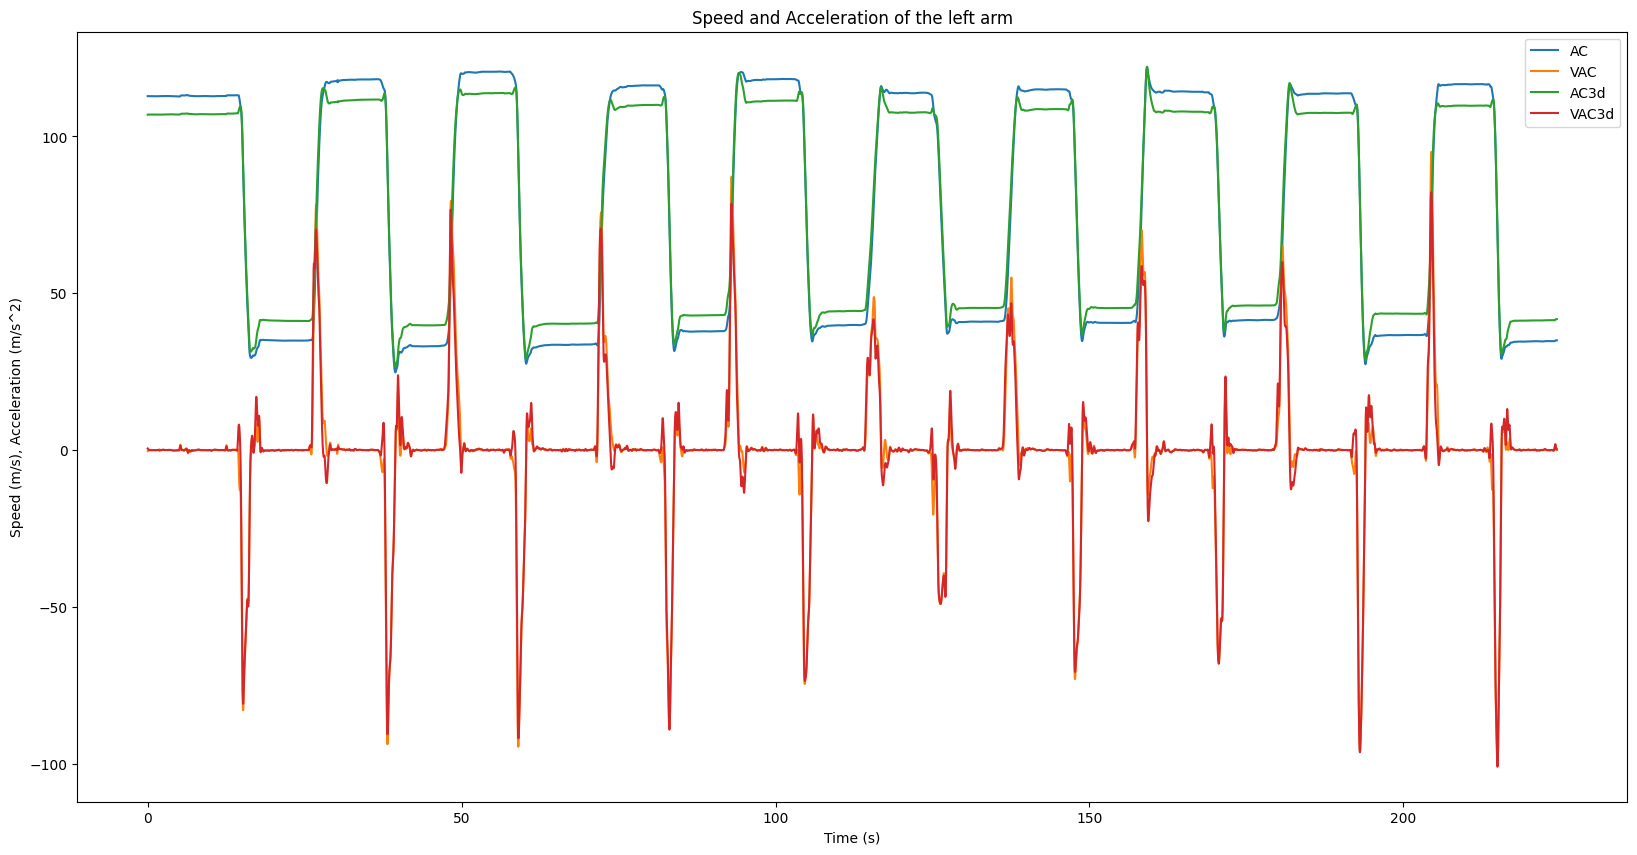

In [17]:
sampling_acc = 125
time_arm_g = [i/sampling_acc for i in range(len(df_speed_arm_g['AC']))]
plt.figure(figsize=(20,10))
plt.plot(time_arm_g, df_speed_arm_g['AC'], label='AC')
plt.plot(time_arm_g, df_speed_arm_g['VAC'], label='VAC')
plt.plot(time_arm_g, df_speed_arm_g['AC3d'], label='AC3d')
plt.plot(time_arm_g, df_speed_arm_g['VAC3d'], label='VAC3d')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s), Acceleration (m/s^2)')
plt.legend()
plt.title('Speed and Acceleration of the left arm')
plt.show()


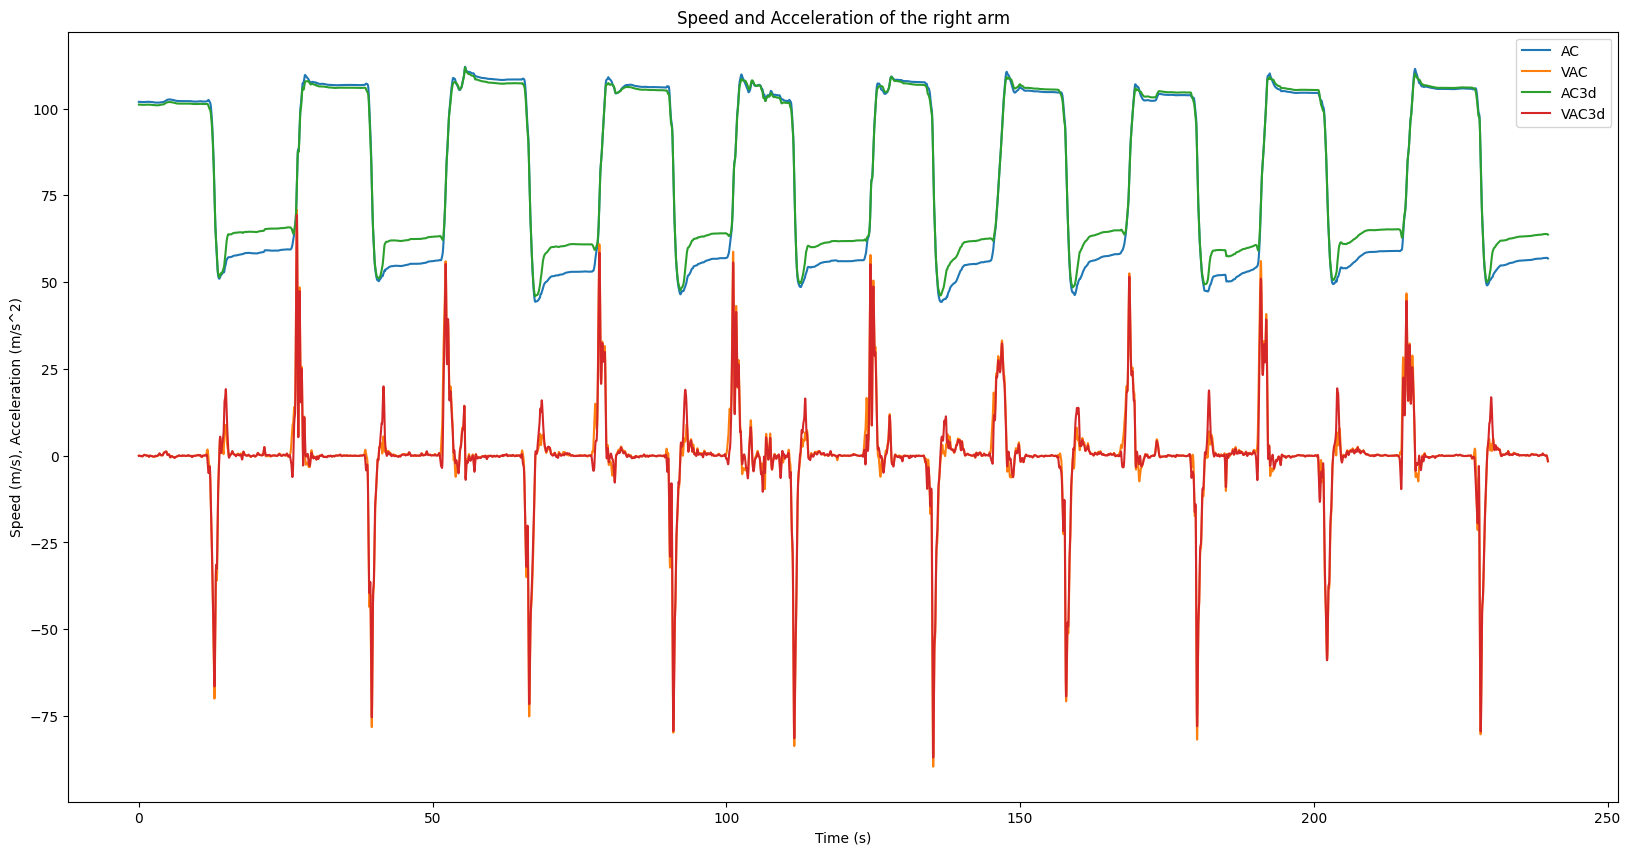

In [18]:
sampling_acc = 125
time_arm_d = [i/sampling_acc for i in range(len(df_speed_arm_d['AC']))]
plt.figure(figsize=(20,10))
plt.plot(time_arm_d, df_speed_arm_d['AC'], label='AC')
plt.plot(time_arm_d, df_speed_arm_d['VAC'], label='VAC')
plt.plot(time_arm_d, df_speed_arm_d['AC3d'], label='AC3d')
plt.plot(time_arm_d, df_speed_arm_d['VAC3d'], label='VAC3d')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s), Acceleration (m/s^2)')
plt.legend()
plt.title('Speed and Acceleration of the right arm')
plt.show()

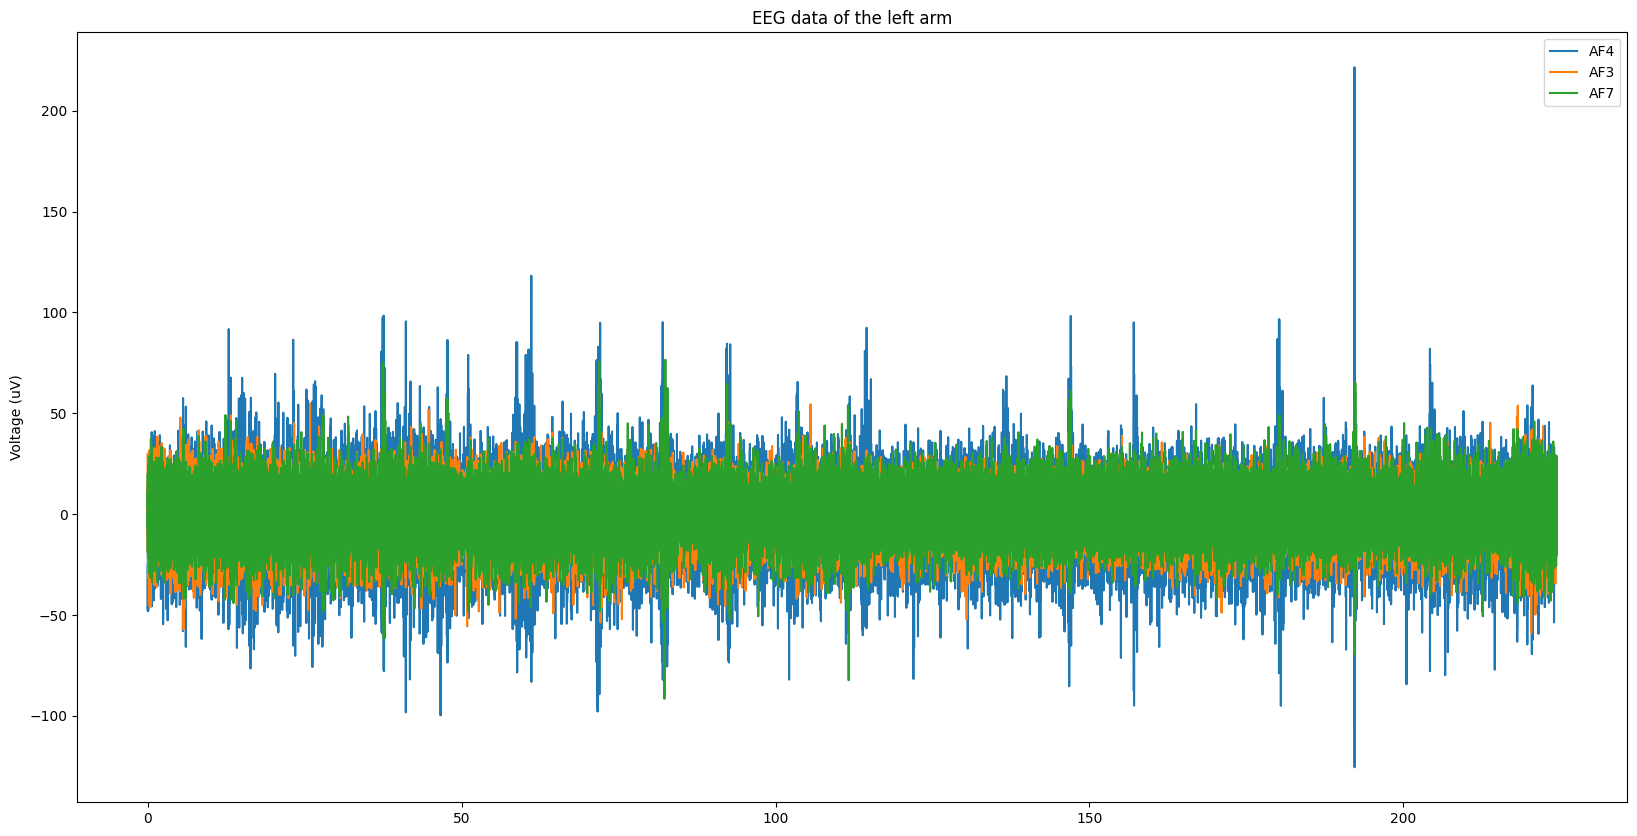

In [19]:
sampling_eeg = 1024
n_sample_eeg_g = df_elec_g['AF4'].shape[0]
time_eeg_g = [i/sampling_eeg for i in range(n_sample_eeg_g)]
plt.figure(figsize=(20,10))
plt.plot(time_eeg_g, df_elec_g['AF4'], label='AF4')
plt.plot(time_eeg_g, df_elec_g['AF3'], label='AF3')
plt.plot(time_eeg_g, df_elec_g['AF7'], label='AF7')
plt.ylabel('Voltage (uV)')
plt.legend()
plt.title('EEG data of the left arm')
plt.show()

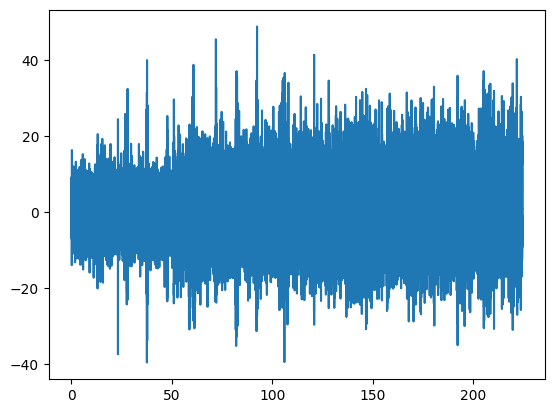

In [68]:
electrode = "C3"
signal_eeg = df_elec_g[electrode]
n_sample = df_elec_g[electrode].shape[0]
sampling = 1024
time = [i/sampling for i in range(n_sample)]

plt.plot(time,signal_eeg)

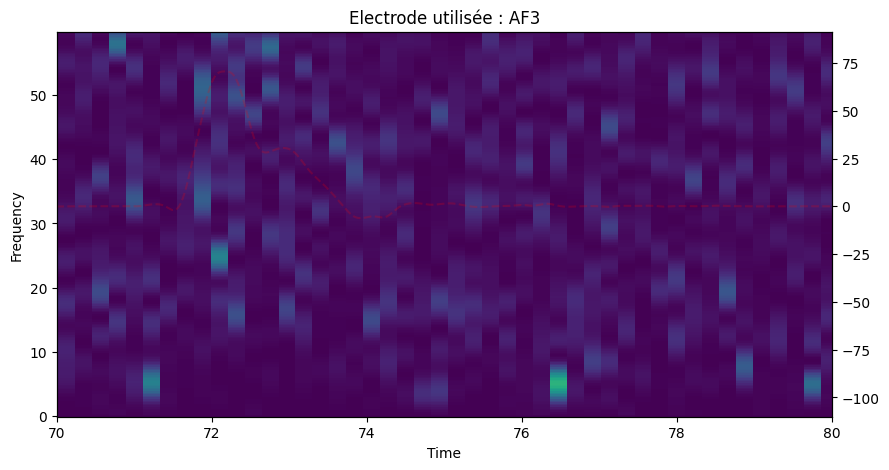

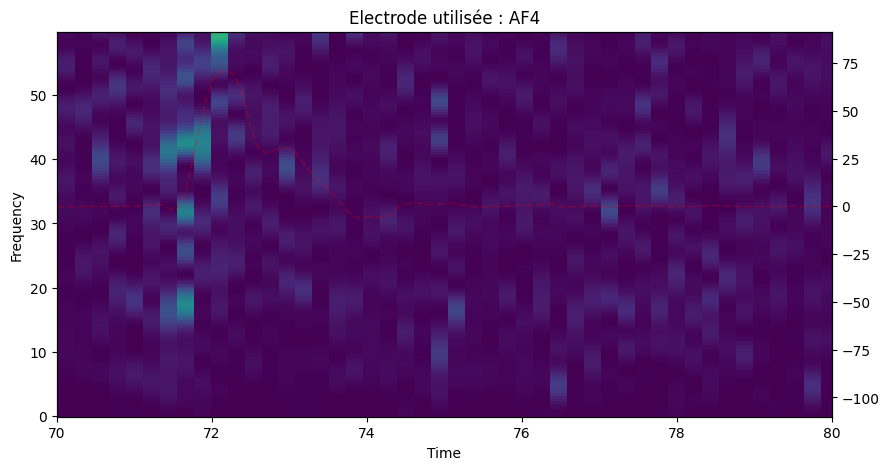

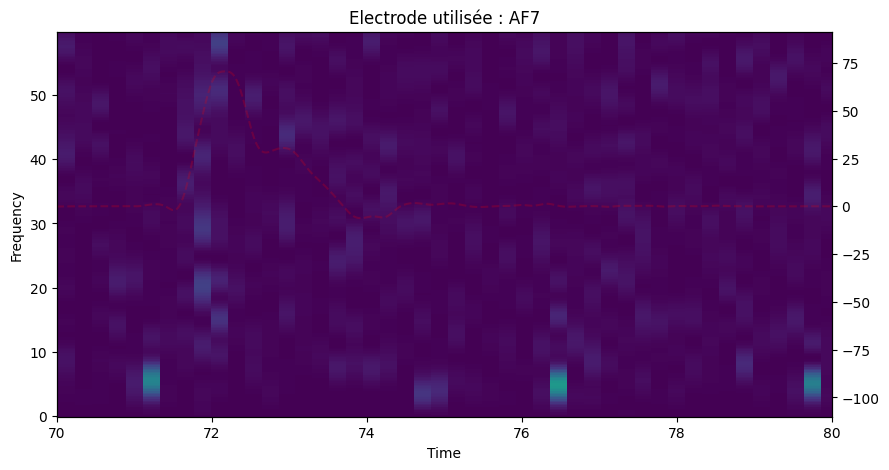

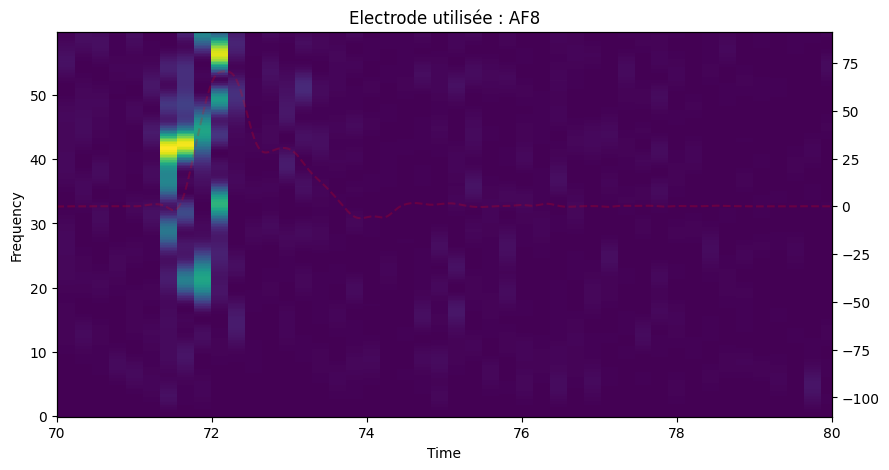

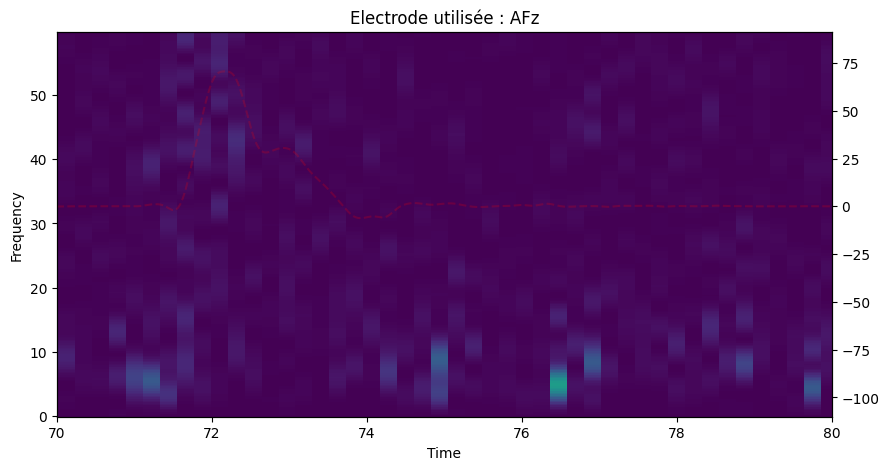

In [102]:
####SPECTROGRAMME ###


from scipy import signal

def plot_spectrogram(electrode):
    # electrode = "C3"
    signal_eeg = df_elec_g[electrode]
    n_sample = df_elec_g[electrode].shape[0]
    sampling = 1024
    time = [i/sampling for i in range(n_sample)]


    f_, t, Sxx_ = signal.spectrogram(signal_eeg, fs=sampling, nfft=4096)

    # On coupe les hautes fréquences pour avoir un signal plus lisible
    threshold_frequence = 60
    mask = f_<threshold_frequence
    f = f_[mask]
    Sxx = Sxx_[mask,:]

    figure = plt.figure()
    figure.set_figwidth(10)
    figure.set_figheight(5)

    plt.pcolormesh(t, f, Sxx)
    plt.ylabel("Frequency")
    plt.xlabel("Time")
    plt.title(f"Electrode utilisée : {electrode}")

    plt.twinx()
    alpha = 0.2
    # plt.plot(time_arm_g, df_speed_arm_g['AC'], '--', label='AC',alpha = alpha)
    # plt.plot(time_arm_g, df_speed_arm_g['VAC'], '--',label='VAC', alpha = alpha)
    # plt.plot(time_arm_g, df_speed_arm_g['AC3d'], '--',label='AC3d',alpha = alpha)
    plt.plot(time_arm_g, df_speed_arm_g['VAC3d'], '--',c = "red",label='VAC3d',alpha = alpha)

    plt.xlim(70,80)

    # figure = plt.figure()
    # figure.set_figwidth(10)
    # figure.set_figheight(5)

    # plt.plot(time, df_speed_arm_g['VAC3d'], '--',c = "red",label='VAC3d',alpha = alpha)
    # plt.plot(time, df_elec_g[electrode])

for electrode in df_elec_d.keys()[:5]:
    plot_spectrogram(electrode)
    

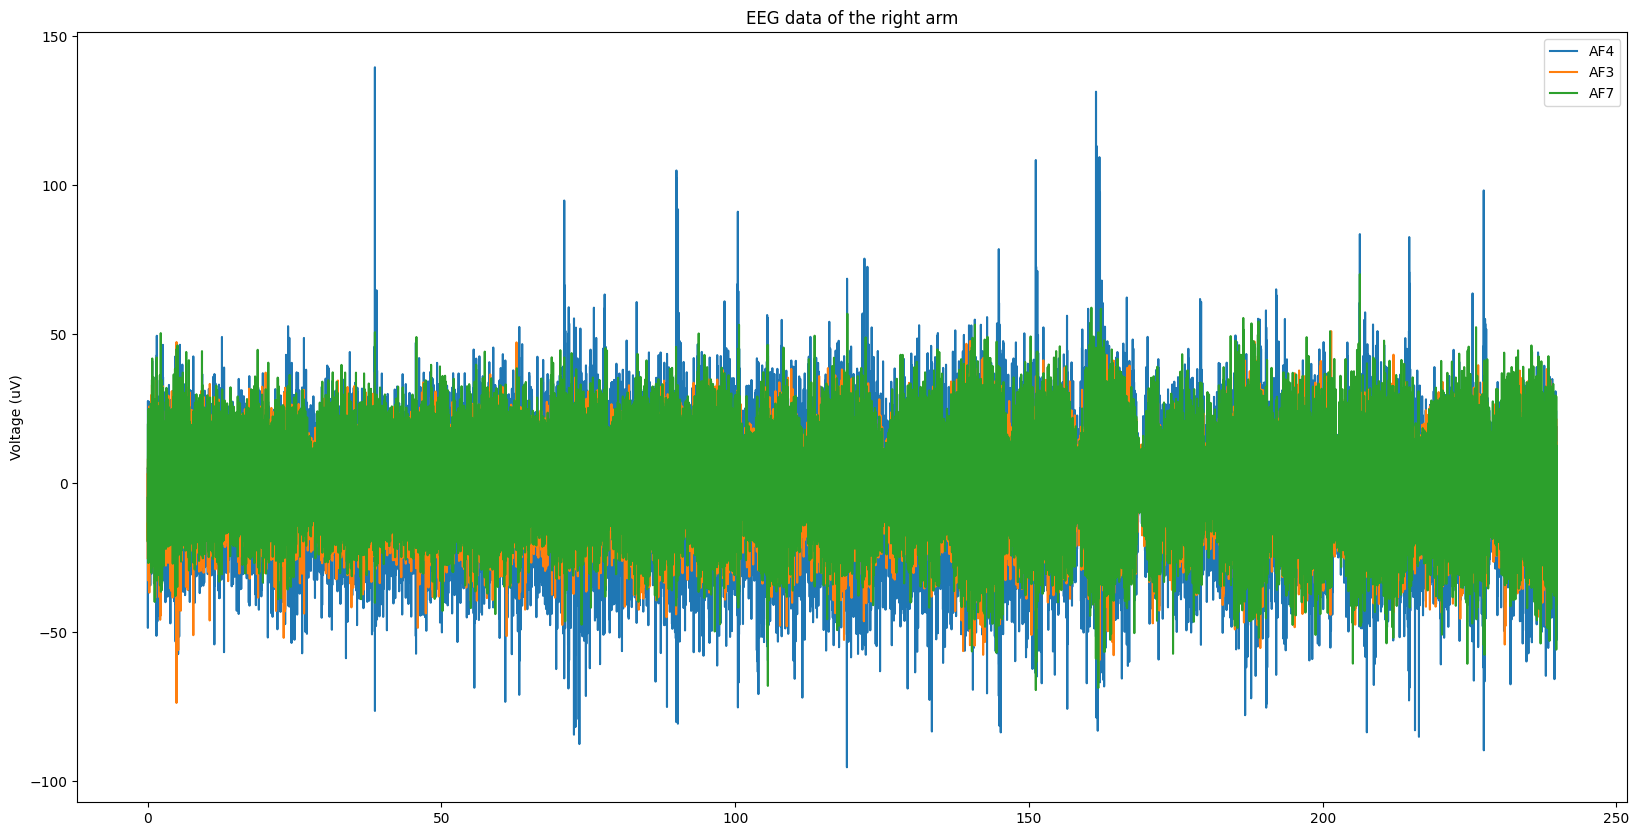

In [135]:
sampling_eeg = 1024
n_sample_eeg_d = df_elec_d['AF4'].shape[0]
time_eeg_d = [i/sampling_eeg for i in range(n_sample_eeg_d)]
plt.figure(figsize=(20,10))
plt.plot(time_eeg_d, df_elec_d['AF4'], label='AF4')
plt.plot(time_eeg_d, df_elec_d['AF3'], label='AF3')
plt.plot(time_eeg_d, df_elec_d['AF7'], label='AF7')
plt.ylabel('Voltage (uV)')
plt.legend()
plt.title('EEG data of the right arm')
plt.show()

In [132]:
def idx_s(sec, sampling=1024):
    return int(sampling*sec)
print(time[:idx_s(10)])



[0.0, 0.0009765625, 0.001953125, 0.0029296875, 0.00390625, 0.0048828125, 0.005859375, 0.0068359375, 0.0078125, 0.0087890625, 0.009765625, 0.0107421875, 0.01171875, 0.0126953125, 0.013671875, 0.0146484375, 0.015625, 0.0166015625, 0.017578125, 0.0185546875, 0.01953125, 0.0205078125, 0.021484375, 0.0224609375, 0.0234375, 0.0244140625, 0.025390625, 0.0263671875, 0.02734375, 0.0283203125, 0.029296875, 0.0302734375, 0.03125, 0.0322265625, 0.033203125, 0.0341796875, 0.03515625, 0.0361328125, 0.037109375, 0.0380859375, 0.0390625, 0.0400390625, 0.041015625, 0.0419921875, 0.04296875, 0.0439453125, 0.044921875, 0.0458984375, 0.046875, 0.0478515625, 0.048828125, 0.0498046875, 0.05078125, 0.0517578125, 0.052734375, 0.0537109375, 0.0546875, 0.0556640625, 0.056640625, 0.0576171875, 0.05859375, 0.0595703125, 0.060546875, 0.0615234375, 0.0625, 0.0634765625, 0.064453125, 0.0654296875, 0.06640625, 0.0673828125, 0.068359375, 0.0693359375, 0.0703125, 0.0712890625, 0.072265625, 0.0732421875, 0.07421875, 0.0

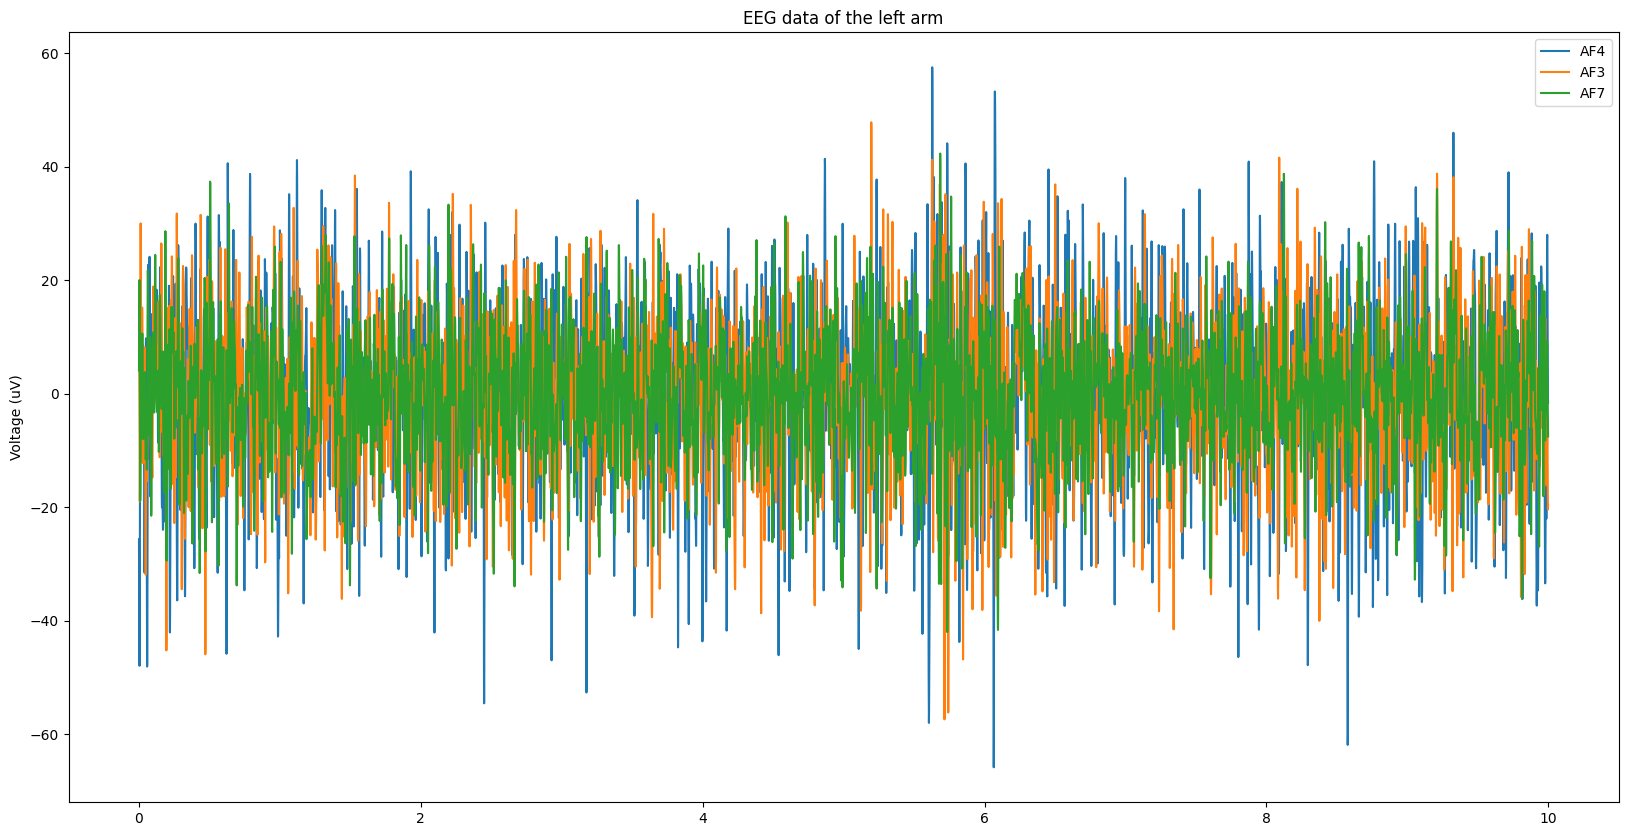

In [137]:
electrods_name = ['AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'F1', 'F2', 'F3','F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8']
plt.figure(figsize=(20,10))
plt.plot(time_eeg_g[:idx_s(10)], df_elec_g['AF4'][:idx_s(10)], label='AF4')
plt.plot(time_eeg_g[:idx_s(10)], df_elec_g['AF3'][:idx_s(10)], label='AF3')
plt.plot(time_eeg_g[:idx_s(10)], df_elec_g['AF7'][:idx_s(10)], label='AF7')
plt.ylabel('Voltage (uV)')
plt.legend()
plt.title('EEG data of the left arm')
plt.show()

In [134]:
print(df_elec_d.columns)

Index(['AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'F1', 'F2', 'F3',
       'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6',
       'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz',
       'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'PO3',
       'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'],
      dtype='object')


In [141]:
df_mple_t1

,0
0,004
1,G
2,Trial1
3,125
4,"[D, [1805.0, 1806.0, 1807.0, 1808.0, 1809.0, 1..."
5,"[G, [1485.0, 1486.0, 1487.0, 1488.0, 1489.0, 1..."
6,mple_


In [147]:
df_mple_t1[0][4]

['D',
 array([ 1805.,  1806.,  1807., ..., 26952., 26953., 26954.]),
 [['AF3',
   array([ 7.39375793, 10.22996413,  7.1848399 , ...,  6.58423858,
           9.01831362, 10.80470349])],
  ['AF4',
   array([-25.66995441, -35.76036098, -42.86720562, ...,  -1.04813976,
            4.00215645,   8.40328872])],
  ['AF7',
   array([ 4.10244227, 10.79684295, 16.66081506, ..., -7.21033679,
          -7.6655503 , -8.16490356])],
  ['AF8',
   array([-4.38369718e+01, -5.88965844e+01, -6.07437671e+01, ...,
          -5.48301998e-02, -7.03572677e-01, -1.04595570e+00])],
  ['AFz',
   array([-5.52351488, -4.39583765, -2.5056132 , ..., -2.91686236,
          -1.75947574, -0.27382556])],
  ['C1',
   array([ 1.36859041,  2.54729092,  3.61896581, ...,  7.14831194,
           8.86193674, 10.06859662])],
  ['C2',
   array([-8.12147008, -6.95351589, -6.18736577, ...,  0.33980747,
           0.74090363,  1.39426335])],
  ['C3',
   array([ 4.65722929,  6.23874833,  7.63679729, ...,  9.05952867,
          12.50

In [160]:
IdvrMVTrddd_array_g = df_mple_t1[0][4][1]
IdvrMVTrddd_array_g

array([ 1805.,  1806.,  1807., ..., 26952., 26953., 26954.])

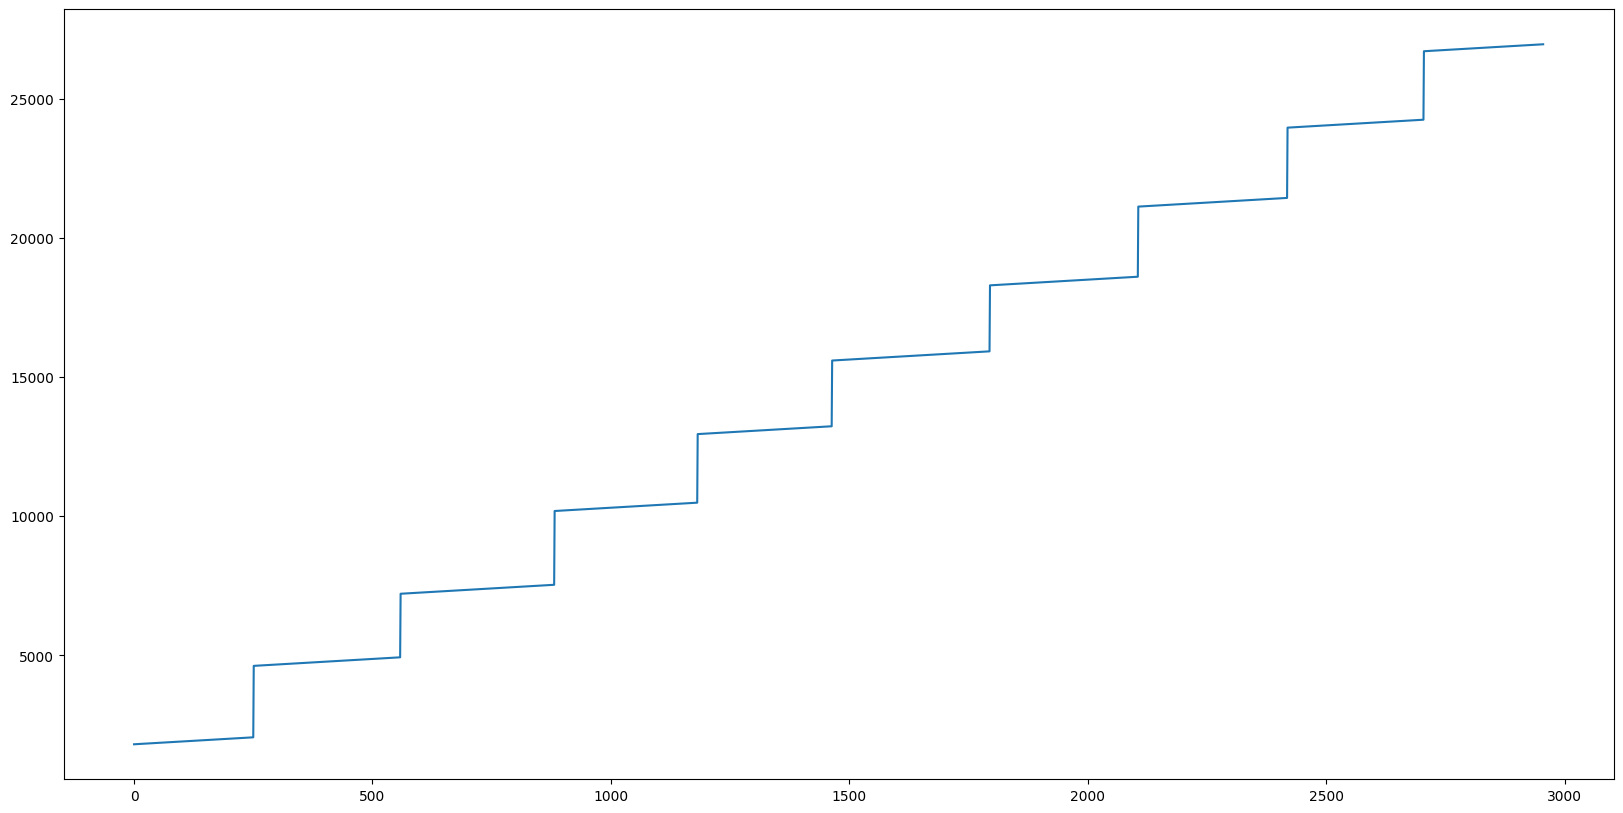

In [161]:
plt.figure(figsize=(20,10))
plt.plot(IdvrMVTrddd_array_g)
plt.show()

In [162]:
np.max(IdvrMVTrddd_array_g)

26954.0

In [163]:
df_elec_d.shape

(245609, 64)

In [156]:
df_speed_arm_d.shape

(29982, 4)

In [166]:
for idx in list(IdvrMVTrddd_array_g):
    print(idx)

1805.0
1806.0
1807.0
1808.0
1809.0
1810.0
1811.0
1812.0
1813.0
1814.0
1815.0
1816.0
1817.0
1818.0
1819.0
1820.0
1821.0
1822.0
1823.0
1824.0
1825.0
1826.0
1827.0
1828.0
1829.0
1830.0
1831.0
1832.0
1833.0
1834.0
1835.0
1836.0
1837.0
1838.0
1839.0
1840.0
1841.0
1842.0
1843.0
1844.0
1845.0
1846.0
1847.0
1848.0
1849.0
1850.0
1851.0
1852.0
1853.0
1854.0
1855.0
1856.0
1857.0
1858.0
1859.0
1860.0
1861.0
1862.0
1863.0
1864.0
1865.0
1866.0
1867.0
1868.0
1869.0
1870.0
1871.0
1872.0
1873.0
1874.0
1875.0
1876.0
1877.0
1878.0
1879.0
1880.0
1881.0
1882.0
1883.0
1884.0
1885.0
1886.0
1887.0
1888.0
1889.0
1890.0
1891.0
1892.0
1893.0
1894.0
1895.0
1896.0
1897.0
1898.0
1899.0
1900.0
1901.0
1902.0
1903.0
1904.0
1905.0
1906.0
1907.0
1908.0
1909.0
1910.0
1911.0
1912.0
1913.0
1914.0
1915.0
1916.0
1917.0
1918.0
1919.0
1920.0
1921.0
1922.0
1923.0
1924.0
1925.0
1926.0
1927.0
1928.0
1929.0
1930.0
1931.0
1932.0
1933.0
1934.0
1935.0
1936.0
1937.0
1938.0
1939.0
1940.0
1941.0
1942.0
1943.0
1944.0
1945.0
1946.0
1947.0

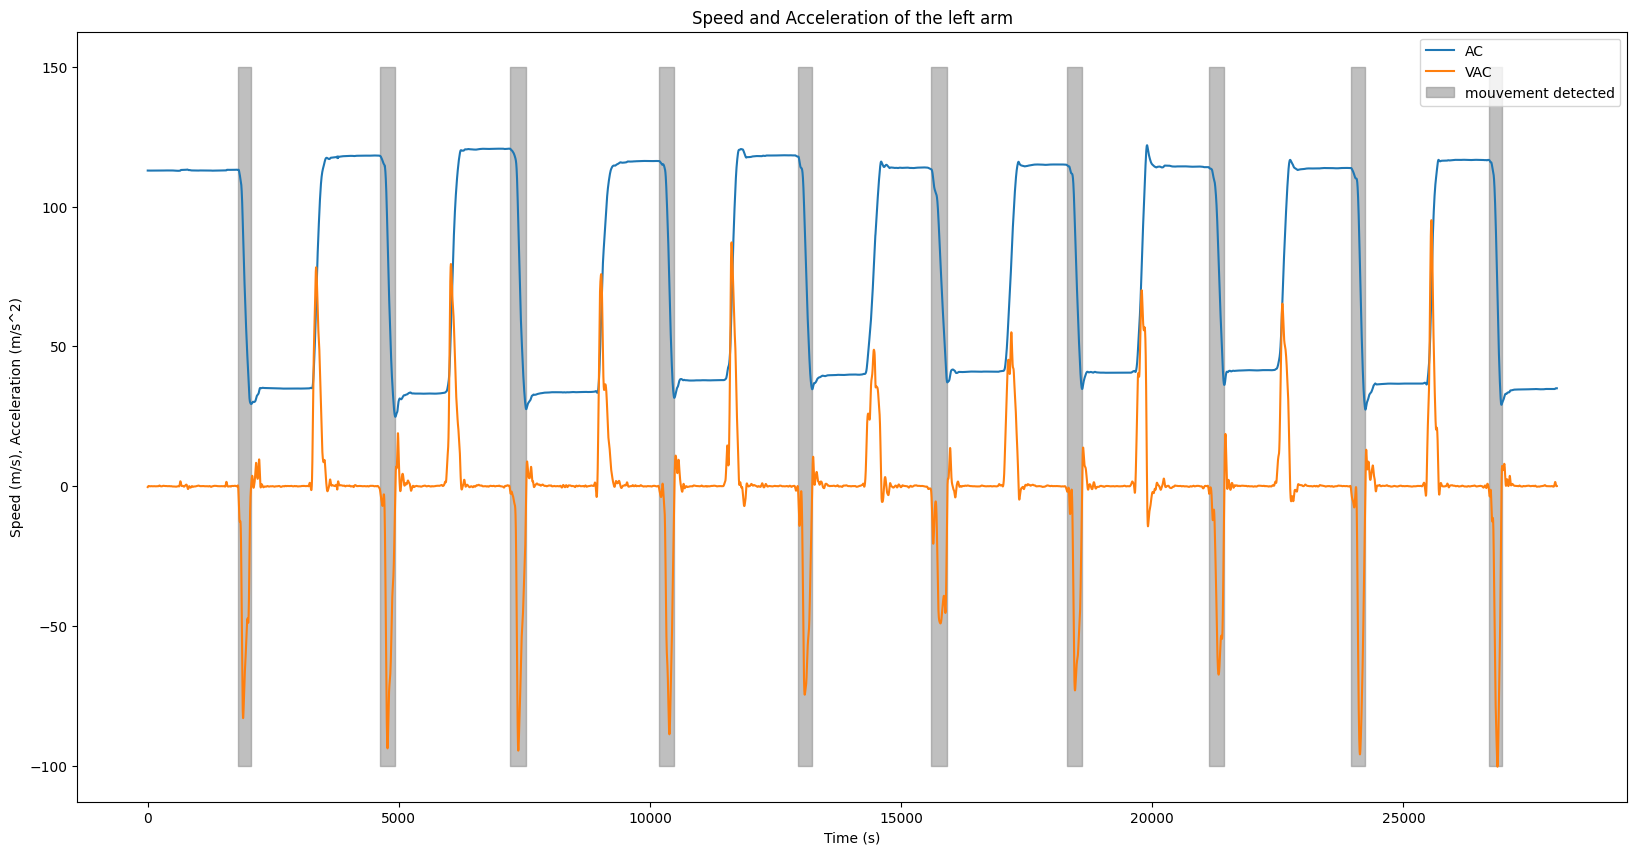

In [192]:
plt.figure(figsize=(20,10))
time = np.arange(df_speed_arm_g['AC'].shape[0])
plt.plot(df_speed_arm_g['AC'], label='AC')
plt.plot(df_speed_arm_g['VAC'], label='VAC')
#plt.plot(time_arm_d, df_speed_arm_d['AC3d'], label='AC3d')
#plt.plot(time_arm_d, df_speed_arm_d['VAC3d'], label='VAC3d')


# Fill between start_time and end_time
mask = np.isin(time, IdvrMVTrddd_array_g)
plt.fill_between(time, -100, 150, where=mask , color='gray', alpha=0.5, label='mouvement detected')


plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s), Acceleration (m/s^2)')
plt.legend()
plt.title('Speed and Acceleration of the left arm')
plt.show()

In [ ]:
#test2